## Install

In [1]:
# univariate analysis
!pip install ydata-profiling==4.12.1

# local time
!pip install pandas pytz==2024.2
!pip install pandas pycountry==24.6.1

# summarize dashboard
!pip install openai pillow==11.0.0
!pip install fpdf==1.7.2

# env variable
!pip install python-dotenv==1.0.1

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.9/390.9 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 44.1 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=2275fcb5518aed3da66e0afc6c526bb0d304f07b0d7809b73123caa2311a66df
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 43.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fpdf: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40704 sha256=da2c8b86f7aef48bfd0cc8bcb864943df641487519257d5267a17a6f05f41e32
  Sto

## Step 0: Load Data

In [2]:
# connect Google Drive
from google.colab import drive

# dataframe
import pandas as pd

# format time
from datetime import datetime
import time

# univariate analysis
from ydata_profiling import ProfileReport

# create chart
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.ticker import FuncFormatter
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
import plotly.express as px

# local time
import pytz  # timezone
import pycountry

# summarize dashboard
import base64
import requests
from fpdf import FPDF

# env varible
import os
from dotenv import load_dotenv

In [3]:
# connect Google Drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [4]:
# load data
eve = pd.read_csv("/content/drive/MyDrive/DA_course1/Final project/events1.csv")
itm = pd.read_csv("/content/drive/MyDrive/DA_course1/Final project/items.csv")
usr = pd.read_csv("/content/drive/MyDrive/DA_course1/Final project/users.csv")

In [5]:
# merge data
comp_data = eve.merge(itm, left_on="item_id", right_on="id", how="outer").merge(
    usr, left_on="user_id", right_on="id", how="inner"
)

Tùy vào mục đích phân tích dữ liệu và cách xử lý dữ liệu khuyết thiếu mà sẽ có nhiều lựa chọn để join. Ở đây lựa chọn các phép join (outer join events1 với items trước thông qua item_id sau đó inner join kết quả thu được với users thông qua user_id) là vì ở đây xác định đối tượng trung tâm là users nên chỉ cần giữ lại các records có liên quan đến users (giải thích cho phép inner join ở cuối) và cần mọi thông tin từ events1 và items (giải thích cho phép outer join ở đầu)
-	Nếu dùng cả 2 phép outer join thì chuyện gì xảy ra? Xuất hiện các records không hữu ích (chứa nhiều giá trị NaN) và tăng kích thước dữ liệu không cần thiết
-	Và như đã nói ở trên tùy vào mục đích phân tích dữ liệu và cách xử lý dữ liệu khuyết thiếu mà sẽ có nhiều lựa chọn để join (left join, right join,…)


## Step 1: Data Dictionary & Data Quality Assessment

### About data

In [6]:
# keys/values of columns
for column in comp_data.columns:
    unique = comp_data[column].unique()
    print(f"Unique value of {column}: {unique}")

Unique value of user_id: [  5115  10904  29457 ... 260725  18261   3772]
Unique value of ga_session_id: [17001 16401 17113 ... 18001 17969 17918]
Unique value of country: ['US' 'TR' 'KR' 'MT' 'ES' 'MX' 'IL' nan 'IN' 'CA' 'GB' 'PL' 'MY' 'QA' 'TW'
 'GR' 'ID' 'RU' 'DE' 'PE' 'FR' 'PK' 'EG' 'JP' 'BD' 'SE' 'HN' 'RS' 'UY'
 'NL' 'IT' 'SG' 'CN' 'HK' 'IE' 'CO' 'TH' 'HR' 'BR' 'AU' 'LK' 'PT' 'CZ'
 'CY' 'AT' 'BA' 'DK' 'RO' 'DZ' 'SA' 'NZ' 'UA' 'NG' 'SK' 'BY' 'BG' 'VN'
 'CH' 'PH' 'SI' 'AR' 'MA' 'GT' 'IQ' 'NO' 'KZ' 'SV' 'LV' 'CL' 'PR' 'BE'
 'PS' 'FI' 'AE' 'DO' 'KW' 'LU' 'GH' 'LT' 'EC' 'GE' 'AM' 'JO' 'XK' 'MK'
 'PY' 'ZA' 'IS' 'MN' 'TN' 'AZ' 'HU' 'KH' 'CR' 'VE' 'TT' 'BO' 'PA' 'EE'
 'AL' 'JM' 'BS' 'NP' 'MO' 'LB' 'BH' 'MM' 'KE' 'OM']
Unique value of device: ['mobile' 'desktop' 'tablet']
Unique value of type: ['purchase' 'add_to_cart' 'begin_checkout']
Unique value of item_id: [   0    1    2 ... 1378 1379 1380]
Unique value of date_x: ['2020-11-02 12:05:14' '2020-11-03 08:19:14' '2020-11-05 18:02:19' ...


- Đưa vào data dictionary:
  + 16 columns và unique values tương ứng với mỗi column
  + Tìm hiểu ý nghĩa của những values

In [7]:
# check unique values of each column
comp_data.nunique()

,0
user_id,14701
ga_session_id,18034
country,108
device,3
type,3
item_id,1381
date_x,78040
id_x,1381
name,421
brand,5


- Đưa vào data dictionary:
  + number of values của từng column

In [8]:
# data info
comp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758884 entries, 0 to 758883
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user_id        758884 non-null  int64 
 1   ga_session_id  758884 non-null  int64 
 2   country        754329 non-null  object
 3   device         758884 non-null  object
 4   type           758884 non-null  object
 5   item_id        758884 non-null  int64 
 6   date_x         758884 non-null  object
 7   id_x           758884 non-null  int64 
 8   name           758884 non-null  object
 9   brand          758884 non-null  object
 10  variant        122624 non-null  object
 11  category       758884 non-null  object
 12  price_in_usd   758884 non-null  int64 
 13  id_y           758884 non-null  int64 
 14  ltv            758884 non-null  int64 
 15  date_y         758884 non-null  object
dtypes: int64(7), object(9)
memory usage: 92.6+ MB


- Phạm vi index từ 0 đến 758883:
  + Chỉ tính các giá trị non-null
  + Có 758884 entries. Trong đó country chỉ có 754329 entries và variant chỉ có 122624 entries => xử lý dữ liệu khuyết thiếu
  + Cột Dtype hiển thị kiểu dữ liệu được lưu trữ. date_x, date_y có kiểu object chứ không phải là datetime => chuyển về datetime

### Check duplicate values

In [9]:
# check duplicate values
dup = comp_data[comp_data.duplicated()]
dup.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39498 entries, 28 to 754587
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   user_id        39498 non-null  int64 
 1   ga_session_id  39498 non-null  int64 
 2   country        39234 non-null  object
 3   device         39498 non-null  object
 4   type           39498 non-null  object
 5   item_id        39498 non-null  int64 
 6   date_x         39498 non-null  object
 7   id_x           39498 non-null  int64 
 8   name           39498 non-null  object
 9   brand          39498 non-null  object
 10  variant        38341 non-null  object
 11  category       39498 non-null  object
 12  price_in_usd   39498 non-null  int64 
 13  id_y           39498 non-null  int64 
 14  ltv            39498 non-null  int64 
 15  date_y         39498 non-null  object
dtypes: int64(7), object(9)
memory usage: 5.1+ MB


- Phạm vi index chứa duplicate values từ 28 đến 754587:
  + 39498 entries duplicated trong 758884 entries đối với varibles chứa dữ liệu đầy đủ
  + 39234 entries duplicated trong 754329 entries đối với country varible
  + 38341 entries duplicated trong 122624 entries đối với variant varible


In [10]:
# drop duplicate values
test = comp_data.drop_duplicates()
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 719386 entries, 0 to 758883
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user_id        719386 non-null  int64 
 1   ga_session_id  719386 non-null  int64 
 2   country        715095 non-null  object
 3   device         719386 non-null  object
 4   type           719386 non-null  object
 5   item_id        719386 non-null  int64 
 6   date_x         719386 non-null  object
 7   id_x           719386 non-null  int64 
 8   name           719386 non-null  object
 9   brand          719386 non-null  object
 10  variant        84283 non-null   object
 11  category       719386 non-null  object
 12  price_in_usd   719386 non-null  int64 
 13  id_y           719386 non-null  int64 
 14  ltv            719386 non-null  int64 
 15  date_y         719386 non-null  object
dtypes: int64(7), object(9)
memory usage: 93.3+ MB


- Duplicate values xuất hiện trong file events1 với 39498 entries (sau khi merge lại thì cũng có 39498 duplicate values). Nếu ta xem xét các thuộc tính của events1{user_id, ga_session_id, country, device, type, item_id, date}. Ta chú ý thuộc tính date được lưu chính xác đến second thì việc giữ duplicate values trong dữ liệu là khó chấp nhận
- Drop duplicate là việc cần thiết trong data cleaning
- Sau khi drop duplicate values còn 719386 entries. Đối với country là 715095 entries và variant là 84283 entries

### Missing Values

In [11]:
# check missing values
print(test.isna().sum())

user_id               0
ga_session_id         0
country            4291
device                0
type                  0
item_id               0
date_x                0
id_x                  0
name                  0
brand                 0
variant          635103
category              0
price_in_usd          0
id_y                  0
ltv                   0
date_y                0
dtype: int64



- country varible miss 4291 entries
- variant varible miss 635103 entries

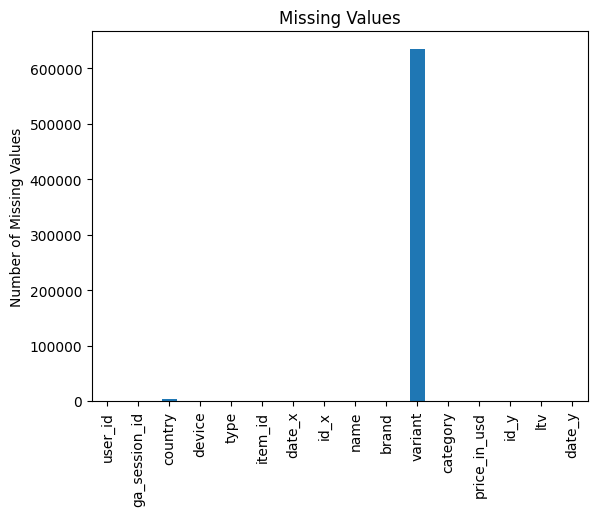

In [12]:
# create bar chart for missing values (use sum)
test.isna().sum().plot(kind="bar")
plt.title("Missing Values")
plt.ylabel("Number of Missing Values")
plt.show()

user_id           0.000000
ga_session_id     0.000000
country           0.596481
device            0.000000
type              0.000000
item_id           0.000000
date_x            0.000000
id_x              0.000000
name              0.000000
brand             0.000000
variant          88.284037
category          0.000000
price_in_usd      0.000000
id_y              0.000000
ltv               0.000000
date_y            0.000000
dtype: float64


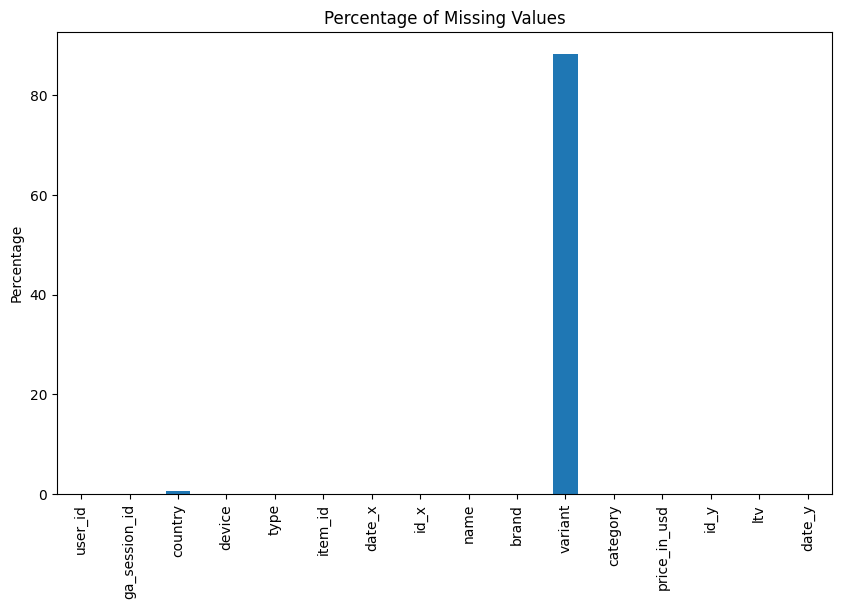

In [13]:
# calculate percentage missing values and create bar chart based on percentage
missing_percentage = (test.isnull().sum() / len(test)) * 100
print(missing_percentage)
plt.figure(figsize=(10, 6))
missing_percentage.plot(kind="bar")
plt.title("Percentage of Missing Values")
plt.ylabel("Percentage")
plt.show()

- Missing values of "country": 0.6% (missing values < 4-5% có thể loại bỏ các hàng)
- Missing values of "variant": 88.3% (missing value > 60% có thẻ loại bỏ cột/biến)
- Khoảng % có thể loại bỏ tham khảo trong bài viết https://medium.com/@danberdov/dealing-with-missing-data-8b71cd819501
- Tuy nhiên khi loại bỏ dữ liệu cần cân nhắc ảnh hưởng đến GMV (một trong những key metrics đối với bài phân tích này). Do đó trong bài phân tích không loại bỏ dữ liệu khuyết thiếu mà chia dữ liệu thành 3 tập dữ liệu mang tính chất khác nhau để tiến hành phân tích:
 + tập dữ liệu "comp_data": chứa dữ liệu đầy đủ ở tất cả các columns => sẽ được phân tích ở những bước tiếp theo
 + tập dữ liệu “data_null_country”: như tên gọi của nó, chứa dữ liệu mà giá trị của country là null => phân tích ở step 3.2
 + tập dữ liệu “variant_null”: chứa dữ liệu mà giá trị của variant là null => phân tích ở step 3.3

In [14]:
# data quality assessment
test.describe()

,user_id,ga_session_id,item_id,id_x,price_in_usd,id_y,ltv
count,719386.000000,719386.000000,719386.000000,719386.000000,719386.000000,719386.000000,719386.000000
mean,30215.532934,3609.655549,920.030530,920.030530,25.043379,30215.532934,59.025124
std,56350.644850,3916.364635,250.526773,250.526773,20.941856,56350.644850,119.815095
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,8420.000000,624.000000,923.000000,923.000000,12.000000,8420.000000,0.000000
50%,17360.000000,2098.500000,975.000000,975.000000,22.000000,17360.000000,0.000000
75%,25914.000000,5350.000000,1042.000000,1042.000000,30.000000,25914.000000,76.000000
max,270145.000000,18033.000000,1380.000000,1380.000000,313.000000,270145.000000,1530.000000


- Tìm min, Q1(25%), Q2(50%), Q3(75%), max của những biến quantitative. Đồng thời để tính khoảng GTBT: Q1-IQR < GTBT < Q3+IQR
- Cách tính IQR = Q3 - Q1
- Khoảng GTBT cover 99.7% dữ liệu
- Outlier là: [min : Q1-IQR] và [Q3+IQR : max]. Lưu ý: trong bài phân tích này các biến quantitative "price_in_usd" và "ltv" được quan tâm và giá trị của 2 biến này đều không âm. Cho nên khi tính ra Q1-IQR mà âm thì tức là không có outlier phía dưới

In [15]:
# rename columns
test = test.rename(
    columns={
        "date_x": "date_session",
        "name": "item_name",
        "date_y": "user_create_date",
    }
)
# remove columns duplicated after join
test.drop(columns=["id_x"], inplace=True)  # same item_id
test.drop(columns=["id_y"], inplace=True)  # same user_id

## Step 2: Deal with missing values

In [16]:
# dataset divides into 3 groups: data_country_null, variant_null, comp_data

data_country_null = test[test["country"].isnull()]

variant_null = test[test["variant"].isnull()]

comp_data = test.copy()
comp_data.drop(
    columns=["variant"], inplace=True
)  # missing values (over 60%), it has been separated into a different group
comp_data = comp_data[
    comp_data["country"].notnull()
]  # select rows where the "country" column has no missing values
# process for comp_data
comp_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 715095 entries, 0 to 758883
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   user_id           715095 non-null  int64 
 1   ga_session_id     715095 non-null  int64 
 2   country           715095 non-null  object
 3   device            715095 non-null  object
 4   type              715095 non-null  object
 5   item_id           715095 non-null  int64 
 6   date_session      715095 non-null  object
 7   item_name         715095 non-null  object
 8   brand             715095 non-null  object
 9   category          715095 non-null  object
 10  price_in_usd      715095 non-null  int64 
 11  ltv               715095 non-null  int64 
 12  user_create_date  715095 non-null  object
dtypes: int64(5), object(8)
memory usage: 76.4+ MB


- Phạm vi index từ 0 đến 758883:
  + 715095 entries trong comp_data

In [17]:
# format the "date_session" and "user_create_date" columns to datetime
comp_data["date_session"] = pd.to_datetime(
    comp_data["date_session"], format="%Y-%m-%d %H:%M:%S"
)
comp_data["user_create_date"] = pd.to_datetime(
    comp_data["user_create_date"], format="%Y-%m-%d %H:%M:%S"
)

# add 2 columns, "hour_session" and "day_of_week", to create a heatmap for later processing
comp_data["hour_session"] = comp_data["date_session"].dt.hour
comp_data["day_of_week"] = comp_data["date_session"].dt.day_name()
comp_data.head(10)

,user_id,ga_session_id,country,device,type,item_id,date_session,item_name,brand,category,price_in_usd,ltv,user_create_date,hour_session,day_of_week
0,5115,17001,US,mobile,purchase,0,2020-11-02 12:05:14,Google Land & Sea Cotton Cap,Google,Apparel,14,85,2020-11-02 11:53:43,12,Monday
1,10904,16401,TR,desktop,purchase,0,2020-11-03 08:19:14,Google Land & Sea Cotton Cap,Google,Apparel,14,40,2020-09-06 09:19:37,8,Tuesday
2,29457,17113,KR,mobile,purchase,0,2020-11-05 18:02:19,Google Land & Sea Cotton Cap,Google,Apparel,14,33,2020-11-05 17:51:34,18,Thursday
3,30148,16175,MT,desktop,purchase,0,2020-11-05 18:33:59,Google Land & Sea Cotton Cap,Google,Apparel,14,517,2020-09-27 21:00:27,18,Thursday
4,32087,15869,US,desktop,purchase,0,2020-11-06 03:39:46,Google Land & Sea Cotton Cap,Google,Apparel,14,55,2020-11-06 03:15:36,3,Friday
5,18184,16368,ES,desktop,purchase,0,2020-11-09 11:16:13,Google Land & Sea Cotton Cap,Google,Apparel,14,86,2020-09-18 18:30:01,11,Monday
6,2418,15838,US,mobile,purchase,0,2020-11-16 01:10:12,Google Land & Sea Cotton Cap,Google,Apparel,14,95,2020-11-16 00:36:18,1,Monday
7,2406,2748,MX,desktop,add_to_cart,0,2020-11-17 00:29:16,Google Land & Sea Cotton Cap,Google,Apparel,14,96,2020-10-01 08:02:17,0,Tuesday
8,2406,2748,MX,desktop,add_to_cart,0,2020-11-17 00:30:31,Google Land & Sea Cotton Cap,Google,Apparel,14,96,2020-10-01 08:02:17,0,Tuesday
9,2406,2748,MX,desktop,add_to_cart,0,2020-11-17 00:35:36,Google Land & Sea Cotton Cap,Google,Apparel,14,96,2020-10-01 08:02:17,0,Tuesday


- Kiểm tra format columns "date_session" và "user_create_date"
- Kiểm tra columns "hour_session" và "day_of_week"

In [18]:
# check info data again after processing
comp_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 715095 entries, 0 to 758883
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   user_id           715095 non-null  int64         
 1   ga_session_id     715095 non-null  int64         
 2   country           715095 non-null  object        
 3   device            715095 non-null  object        
 4   type              715095 non-null  object        
 5   item_id           715095 non-null  int64         
 6   date_session      715095 non-null  datetime64[ns]
 7   item_name         715095 non-null  object        
 8   brand             715095 non-null  object        
 9   category          715095 non-null  object        
 10  price_in_usd      715095 non-null  int64         
 11  ltv               715095 non-null  int64         
 12  user_create_date  715095 non-null  datetime64[ns]
 13  hour_session      715095 non-null  int32         
 14  day_of_we

- Check data type of "date_session" và "user_create_date"

## Step 3.1: EDA for complete data

### Univariate: use profiling

In [19]:
# export univariate analysis to file html
profile = ProfileReport(comp_data, title="Pandas Profiling Report")
profile.to_file(
    "/content/drive/MyDrive/DA_course1/Final project/univariate_profilling.html"
)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/ydata_profiling/model/pandas/discretize_pandas.py:52: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[5 3 7 ... 1 4 2]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  discretized_df.loc[:, column] = self._discretize_column(


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

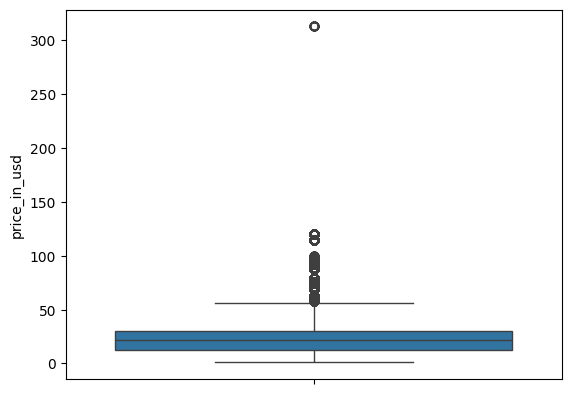

In [20]:
# create boxplot chart for price_in_usd varible
sns.boxplot(y=comp_data["price_in_usd"])
plt.show()

GTBT của "price_in_usd" nằm trong khoảng đâu đó từ 0 cho đến 60/70 cover được 99.7% dữ liệu là các GTBT (giá trị bình thường)

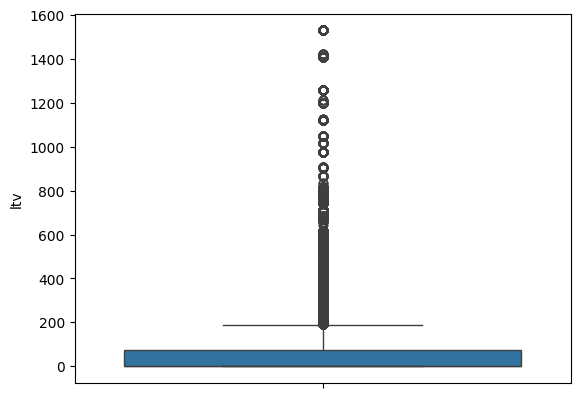

In [21]:
# create boxplot chart for ltv varible
sns.boxplot(y=comp_data["ltv"])
plt.show()

GTBT của "ltv" từ 0 cho đến dao động xung quanh 200

### Bivariate

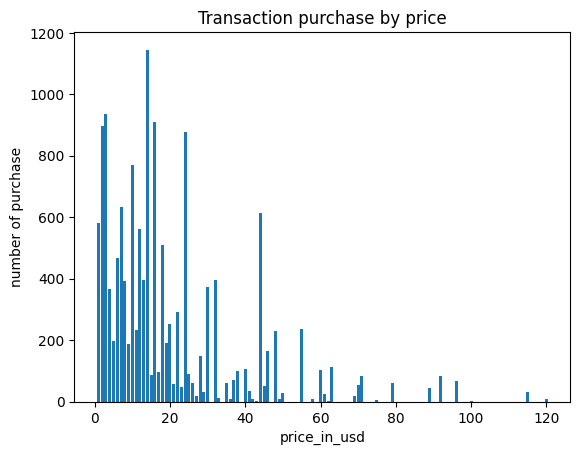

In [22]:
# number of purchase transaction by price
data = comp_data[comp_data["type"] == "purchase"][
    "price_in_usd"
].value_counts()  # GMV is only generated by purchases
plt.bar(data.index, data.values)
plt.xlabel("price_in_usd")
plt.ylabel("number of purchase")
plt.title("Transaction purchase by price")
plt.show()

**Nhận xét**
- Những items được mua nhiều nhất có giá dao động từ 0-30, 30-60, sau đó thì thưa dần và thấp nhất

**Đề xuất**
- Sản xuất những sản phẩm có giá trong khoảng từ 0-30, 30-60. Và chủ yếu nên tập trung vào phân khúc giá từ 0-30, còn giá 30-60 sẽ là những sản phẩm tiềm năng

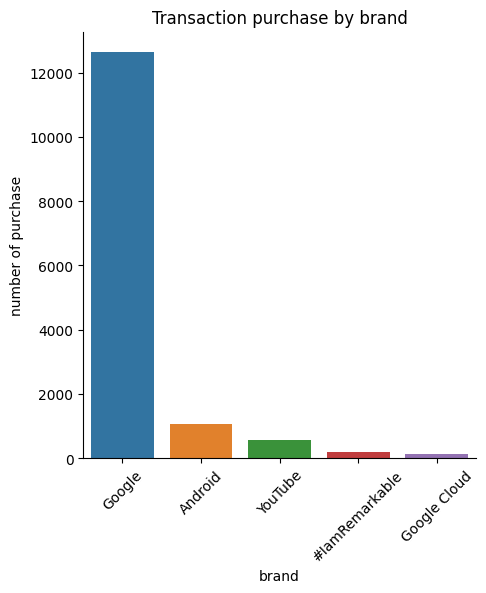

In [23]:
# number of purchase transaction by brand
sns.catplot(
    x="brand",
    kind="count",
    hue="brand",
    data=comp_data[comp_data["type"] == "purchase"],
)
plt.ylabel("number of purchase")
plt.title("Transaction purchase by brand")
plt.xticks(rotation=45)
plt.show()

**Nhận xét**
- Items thuộc brand Google được mua nhiều nhất. Brand Google có nhận dạng thương hiệu tốt nhất

**Đề xuất**
- Tung ra thị trường nhiều sản phẩm thuộc thương hiệu Google hơn
- Cải thiện khả năng nhận diện thương hiệu đối với các items thuộc Android và Youtube bằng các campaign quảng cáo

<ipython-input-24-f08ef8ed8d56>:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
<ipython-input-24-f08ef8ed8d56>:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
<ipython-input-24-f08ef8ed8d56>:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


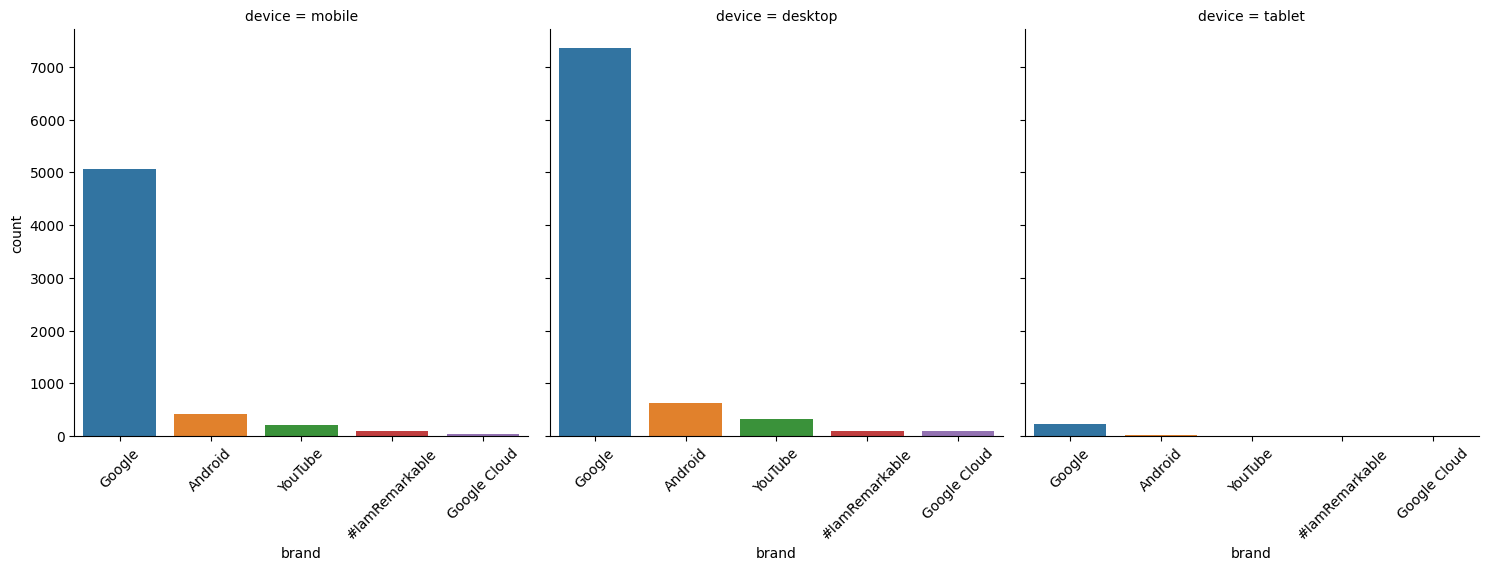

In [24]:
# number of purchase transaction by brand, device
g = sns.catplot(
    x="brand",
    kind="count",
    col="device",
    hue="brand",
    data=comp_data[comp_data["type"] == "purchase"],
)
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

**Nhận xét**
- Mặc dù trên các thiết bị khác nhau nhưng các items của brand Google vẫn được mua nhiều nhất, sau đó đến Android và Youtube. Không có sự biến đổi thứ tự so với thống kê chung ở trên
- Users sử dụng thiết bị desktop nhiều nhất, sau đó đến mobile cho nên việc users mua sản phẩm trên 2 thiết bị này theo những brand khác nhau vẫn đứng cao nhất và cao thứ hai vẫn giống so với thống kê chung

**Đề xuất**
- Chạy các campaign quảng cáo song song trên 2 nền tảng desktop và mobile. Mục đích là vừa để quảng cáo trực tiếp, vừa để quảng cáo chéo. Điều này có nghĩa là, ví dụ muốn tăng GMV đối với thiết bị mobile thì có thể chạy campaign quảng cáo kèm theo voucher được áp dụng trên mobile nhưng không được áp dụng trên desktop để kích thích người mua tiêu dùng trên mobile

In [25]:
# create a scatter plot using Plotly Express
fig = px.scatter(
    comp_data[comp_data["type"] == "purchase"],
    x="ltv",
    y="price_in_usd",
    title="<b>Relationship between Lifetime Value and Price in USD</b>",
    trendline="ols",
)

fig.update_layout(xaxis_title="lifetime value", yaxis_title="price in usd", title_x=0.5)

fig.show()

**Nhận xét:**
- 2 biến lifetime value và price in usd tỉ lệ thuận với nhau (nhưng chỉ là tuyến tính yếu). Tuy nhiên số lượng transaction giảm
- Lifetime value tập trung từ 0-400: giá trị người dùng tạo ra từ 0-400usd. price_in_usd được chi nhiều trong khoảng này là từ 0-30, từ 30-60

**Đề xuất:**
- Đưa ra những campaign thu hút nhiều khách hàng mới
- Có những chính sách chăm sóc, giữ chân khách hàng như là hạng thành viên đối với những users có ltv cao

#### Actions of users

             type  total_actions  percentage
0     add_to_cart         662094   92.588258
1  begin_checkout          38369    5.365581
2        purchase          14632    2.046162


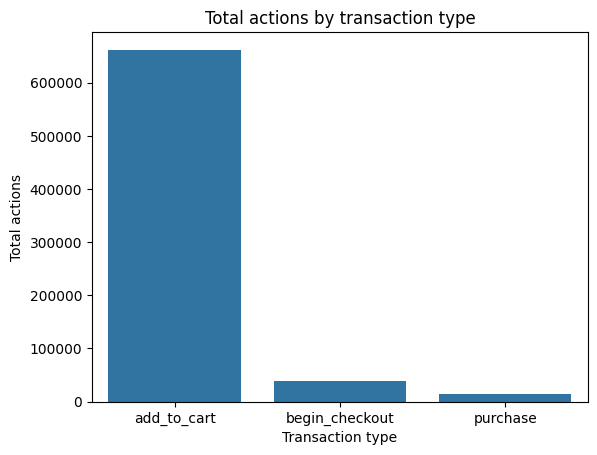

In [26]:
# total action of users by 3 types: add_to_cart, begin_checkout, purchase
user_count_by_type = comp_data.groupby("type")["user_id"].count().reset_index()
user_count_by_type = user_count_by_type.rename(columns={"user_id": "total_actions"})
user_count_by_type["percentage"] = (
    user_count_by_type["total_actions"]
    * 100
    / user_count_by_type["total_actions"].sum()
)
print(user_count_by_type)

sns.barplot(x="type", y="total_actions", data=user_count_by_type)
plt.title("Total actions by transaction type")
plt.xlabel("Transaction type")
plt.ylabel("Total actions")
plt.show()

**Nhận xét**
- Type "add_to_cart" chiếm tỷ lệ cao nhất và cũng lớn nhất (92.59%) so với các type còn lại. Tuy nhiên type này không tạo ra GMV cho doanh nghiệp.
- Lí do:
  + Những sản phẩm này là những sản phẩm họ thích
  + Xem giá của sản phẩm có được ưu đãi gì không

**Đề xuất**
- Đưa ra chương trình ưu đãi phù hợp đối với những sản phẩm được add to cart nhiều (có thể tham khảo giá sản phẩm cùng loại của đối thủ cạnh tranh nếu có)
- Từ những sản phẩm mà khách hàng yêu thích có thể đề xuất thêm những sản phẩm cùng loại cho khách hàng

In [27]:
# vip users
purchase_data = comp_data[comp_data["type"] == "purchase"]
vip_users = purchase_data.groupby("user_id")["price_in_usd"].sum()
vip_users = vip_users.sort_values(ascending=False).reset_index()
print(vip_users.head())

   user_id  price_in_usd
0     7765          1410
1    11073           878
2    20451           857
3     1298           818
4    28943           781


**Đề xuất**
- Đối với những khách hàng này là những khách hàng chi nhiều tiền nhất để mua sản phẩm, nên cần có những chính sách chăm sóc khách hàng phù hợp
  + Áp dụng các hạng thành viên để tương ứng với những khách hàng thành viên có những chính sách ưu tiên riêng: kim cương, vàng, bạc, đồng để giữ chân khách hàng

In [28]:
# items 'Add to Cart' but not purchase
add_to_cart_not_purchased = comp_data[
    (comp_data["type"] == "add_to_cart")
    & (
        ~comp_data["user_id"].isin(
            comp_data[comp_data["type"] == "purchase"]["user_id"]
        )
    )
]

add_to_cart_counts = (
    add_to_cart_not_purchased.groupby("item_name")["user_id"].count().reset_index()
)
add_to_cart_counts = add_to_cart_counts.rename(
    columns={"user_id": "quantity_add_to_cart"}
)
add_to_cart_counts = add_to_cart_counts.sort_values(
    by="quantity_add_to_cart", ascending=False
).reset_index()

print(add_to_cart_counts[["item_name", "quantity_add_to_cart"]].head())

                         item_name  quantity_add_to_cart
0         Google Navy Speckled Tee                  7698
1            Google Zip Hoodie F/C                  7630
2           Super G Unisex Joggers                  6957
3       Google Women's Striped L/S                  6732
4  Google Campus Bike Eco Tee Navy                  6396


**Nhận xét**
- Đối với một số sản phẩm như: Google Zip Hoodie F/C được purchase nhiều nhất cũng là những sản phẩm được add to cart nhiều nhất

**Đề xuất**
- Giống như phần Total actions by transaction type

### Multivariate Analysis

#### Global

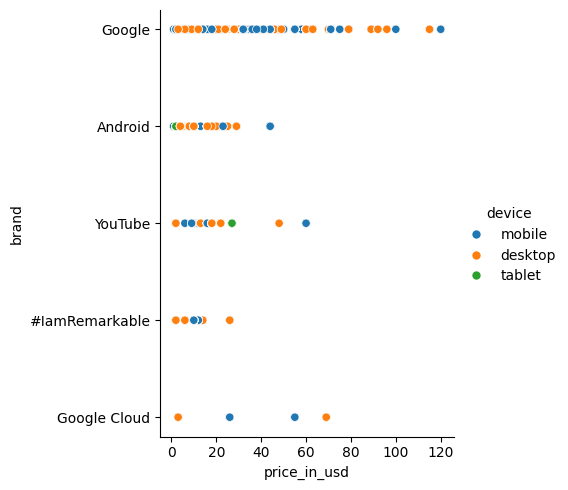

In [29]:
# price distribution for brands by device
sns.relplot(
    x="price_in_usd",
    y="brand",
    hue="device",
    data=comp_data[comp_data["type"] == "purchase"],
)
plt.show()

**Nhận xét:**
- Giá của items dao động từ 0-100
- Người dùng sử dụng mobile và desktop là nhiều nhất
- Họ mua hàng nhiều ở brand Google và Android

**Đề xuất:**
- Giữ giá của sản phẩm trong mức từ 0-100. Không nên bán sản phẩm với giá cao hơn
- Đảm bảo giao diện người dùng và tốc độ xử lý các session trên 2 thiết bị là mobile và desktop được tốt nhất
- Bán thêm những mặt hàng thuộc thương hiệu Google và Android

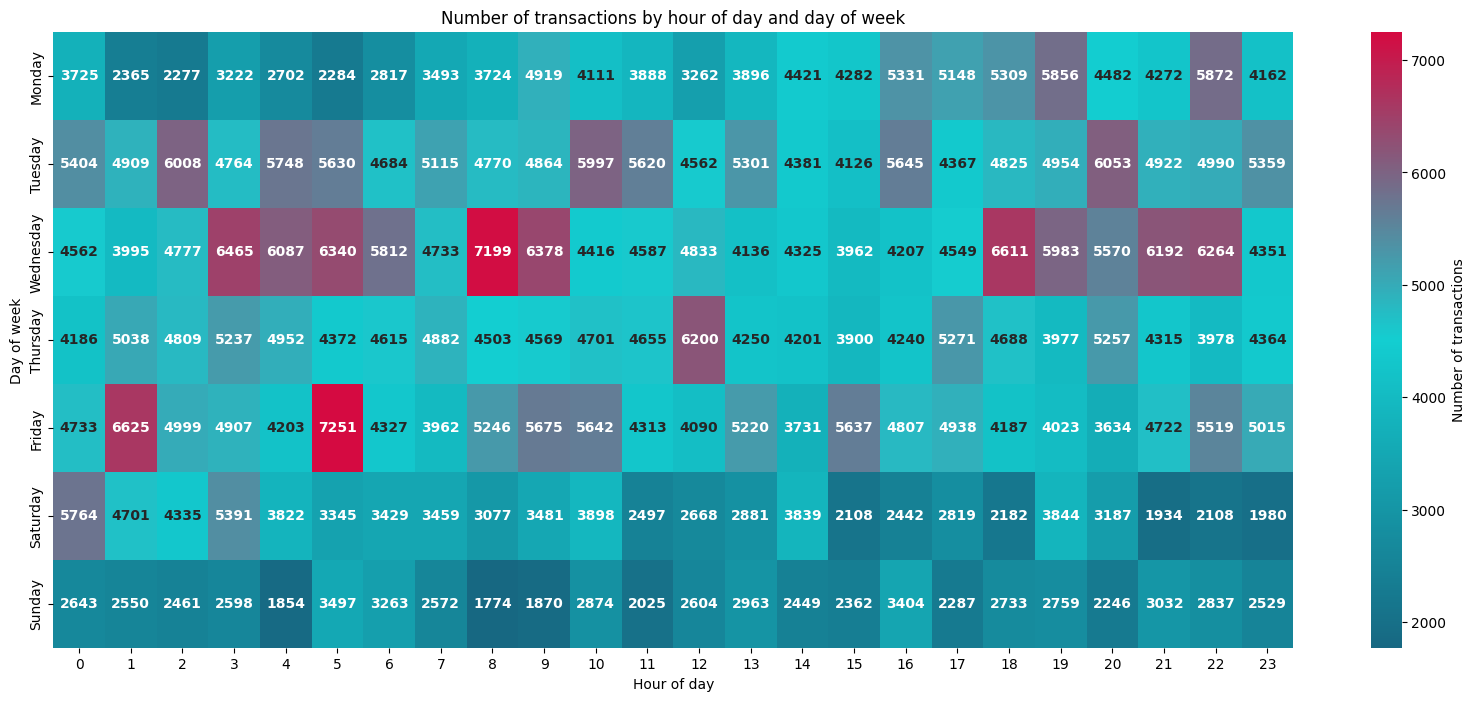

In [30]:
# number of transactions by hour of day and day of week
# create pivot table for heatmap
heatmap_data = comp_data.pivot_table(
    values="price_in_usd",
    index="day_of_week",
    columns="hour_session",
    aggfunc="count",
    fill_value=0,
)

# rearrange the order of days in the week to display correctly
days_order = [
    "Monday",
    "Tuesday",
    "Wednesday",
    "Thursday",
    "Friday",
    "Saturday",
    "Sunday",
]
heatmap_data = heatmap_data.reindex(days_order)


def integer_formatter(x, pos):
    return f"{int(x)}"


# edit color
colors = ["#176882", "#13CED1", "#D50A41"]
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", colors)

# create heatmap
plt.figure(figsize=(20, 8))
ax = sns.heatmap(
    heatmap_data,
    cmap=custom_cmap,
    annot=True,
    fmt="",
    cbar_kws={"label": "Number of transactions"},
    annot_kws={"size": 10, "weight": "bold"},
)

ax.collections[0].colorbar.ax.yaxis.set_major_formatter(
    FuncFormatter(integer_formatter)
)

plt.title("Number of transactions by hour of day and day of week")
plt.xlabel("Hour of day")
plt.ylabel("Day of week")

plt.show()

- Giờ được lưu dưới dạng UTC timestamp. Đánh giá dữ liệu global nên vẫn giữ định dạng UTC timestamp để dữ liệu được nhất quán
- Trong phần Country tiếp theo sẽ thực hiện đánh giá riêng cho từng quốc gia. Nên tương ứng với mỗi country thì thời gian sẽ được chuyển về đúng timezone của quốc gia đó (đối với các countries nằm trên nhiều timezone thì lấy timezone phổ biến nhất của countries đó)

**Nhận xét:**
- Trong 3 tháng dữ liệu được thống kê thì users mua hàng nhiều nhất vào thứ 4 khung giờ từ 3-6, 8-9 và 18-22. Thứ 4 có thể là do trước dịp Giáng sinh 1 ngày
- Thứ 6 vào lúc 5h là có số lượng users mua hàng nhiều nhất. Có thể doanh thu tăng là do Black Friday

**Đề xuất:**
- Đối với những ngày, những giờ mà có users sử dụng nhiều nhất thì hệ thống nên đảm bảo để users có được trải nghiệm mua hàng tốt nhất
- Đối với những ngày, những giờ thấp điểm thì hệ thống có thể sử dụng để bảo trì

#### Country

In [31]:
local_comp_data = comp_data.copy()
# mapping country - timezone
country_timezones = {
    "US": "America/New_York",
    "TR": "Europe/Istanbul",
    "KR": "Asia/Seoul",
    "MT": "Europe/Malta",
    "ES": "Europe/Madrid",
    "MX": "America/Mexico_City",
    "IL": "Asia/Jerusalem",
    "IN": "Asia/Kolkata",
    "CA": "America/Toronto",
    "GB": "Europe/London",
    "PL": "Europe/Warsaw",
    "MY": "Asia/Kuala_Lumpur",
    "QA": "Asia/Qatar",
    "TW": "Asia/Taipei",
    "GR": "Europe/Athens",
    "ID": "Asia/Jakarta",
    "RU": "Europe/Moscow",
    "DE": "Europe/Berlin",
    "PE": "America/Lima",
    "FR": "Europe/Paris",
    "PK": "Asia/Karachi",
    "EG": "Africa/Cairo",
    "JP": "Asia/Tokyo",
    "BD": "Asia/Dhaka",
    "SE": "Europe/Stockholm",
    "HN": "America/Tegucigalpa",
    "RS": "Europe/Belgrade",
    "UY": "America/Montevideo",
    "NL": "Europe/Amsterdam",
    "IT": "Europe/Rome",
    "SG": "Asia/Singapore",
    "CN": "Asia/Shanghai",
    "HK": "Asia/Hong_Kong",
    "IE": "Europe/Dublin",
    "CO": "America/Bogota",
    "TH": "Asia/Bangkok",
    "HR": "Europe/Zagreb",
    "BR": "America/Sao_Paulo",
    "AU": "Australia/Sydney",
    "LK": "Asia/Colombo",
    "PT": "Europe/Lisbon",
    "CZ": "Europe/Prague",
    "CY": "Asia/Nicosia",
    "AT": "Europe/Vienna",
    "BA": "Europe/Sarajevo",
    "DK": "Europe/Copenhagen",
    "RO": "Europe/Bucharest",
    "DZ": "Africa/Algiers",
    "SA": "Asia/Riyadh",
    "NZ": "Pacific/Auckland",
    "UA": "Europe/Kiev",
    "NG": "Africa/Lagos",
    "SK": "Europe/Bratislava",
    "BY": "Europe/Minsk",
    "BG": "Europe/Sofia",
    "VN": "Asia/Ho_Chi_Minh",
    "CH": "Europe/Zurich",
    "PH": "Asia/Manila",
    "SI": "Europe/Ljubljana",
    "AR": "America/Argentina/Buenos_Aires",
    "MA": "Africa/Casablanca",
    "GT": "America/Guatemala",
    "IQ": "Asia/Baghdad",
    "NO": "Europe/Oslo",
    "KZ": "Asia/Almaty",
    "SV": "America/El_Salvador",
    "LV": "Europe/Riga",
    "CL": "America/Santiago",
    "PR": "America/Puerto_Rico",
    "BE": "Europe/Brussels",
    "PS": "Asia/Gaza",
    "FI": "Europe/Helsinki",
    "AE": "Asia/Dubai",
    "DO": "America/Santo_Domingo",
    "KW": "Asia/Kuwait",
    "LU": "Europe/Luxembourg",
    "GH": "Africa/Accra",
    "LT": "Europe/Vilnius",
    "EC": "America/Guayaquil",
    "GE": "Asia/Tbilisi",
    "AM": "Asia/Yerevan",
    "JO": "Asia/Amman",
    "XK": "Europe/Belgrade",
    "MK": "Europe/Skopje",
    "PY": "America/Asuncion",
    "ZA": "Africa/Johannesburg",
    "IS": "Atlantic/Reykjavik",
    "MN": "Asia/Ulaanbaatar",
    "TN": "Africa/Tunis",
    "AZ": "Asia/Baku",
    "HU": "Europe/Budapest",
    "KH": "Asia/Phnom_Penh",
    "CR": "America/Costa_Rica",
    "VE": "America/Caracas",
    "TT": "America/Port_of_Spain",
    "BO": "America/La_Paz",
    "PA": "America/Panama",
    "EE": "Europe/Tallinn",
    "AL": "Europe/Tirane",
    "JM": "America/Jamaica",
    "BS": "America/Nassau",
    "NP": "Asia/Kathmandu",
    "MO": "Asia/Macau",
    "LB": "Asia/Beirut",
    "BH": "Asia/Bahrain",
    "MM": "Asia/Yangon",
    "KE": "Africa/Nairobi",
    "OM": "Asia/Muscat",
}


def convert_utc_to_country_timezone(row):
    try:
        # retrieve the timezone associated with the country
        country = row["country"]
        timezone = country_timezones.get(country, "UTC")  # if not, keep UTC
        utc_time = pd.to_datetime(row["date_session"], utc=True)  # ensure datetime UTC
        local_time = utc_time.tz_convert(timezone)  # transform country timezone
        return local_time
    except Exception as e:
        print(f"Error converting time for row {row}: {e}")
        return None


local_comp_data["local_time"] = local_comp_data.apply(
    convert_utc_to_country_timezone, axis=1
)

# convert to string and extract the required value
local_comp_data["local_time"] = local_comp_data["local_time"].apply(str)
local_comp_data["local_time"] = local_comp_data["local_time"].apply(
    lambda x: str(x)[:19]
)

# convert the data in the 'local_time' column to datetime format
local_comp_data["local_time"] = pd.to_datetime(
    local_comp_data["local_time"], format="%Y-%m-%d %H:%M:%S"
)

# add 2 columns: 'local_hour_session' and 'local_day_of_week'
local_comp_data["local_hour_session"] = local_comp_data["local_time"].dt.hour
local_comp_data["local_day_of_week"] = local_comp_data["local_time"].dt.day_name()
local_comp_data.head()

,user_id,ga_session_id,country,device,type,item_id,date_session,item_name,brand,category,price_in_usd,ltv,user_create_date,hour_session,day_of_week,local_time,local_hour_session,local_day_of_week
0,5115,17001,US,mobile,purchase,0,2020-11-02 12:05:14,Google Land & Sea Cotton Cap,Google,Apparel,14,85,2020-11-02 11:53:43,12,Monday,2020-11-02 07:05:14,7,Monday
1,10904,16401,TR,desktop,purchase,0,2020-11-03 08:19:14,Google Land & Sea Cotton Cap,Google,Apparel,14,40,2020-09-06 09:19:37,8,Tuesday,2020-11-03 11:19:14,11,Tuesday
2,29457,17113,KR,mobile,purchase,0,2020-11-05 18:02:19,Google Land & Sea Cotton Cap,Google,Apparel,14,33,2020-11-05 17:51:34,18,Thursday,2020-11-06 03:02:19,3,Friday
3,30148,16175,MT,desktop,purchase,0,2020-11-05 18:33:59,Google Land & Sea Cotton Cap,Google,Apparel,14,517,2020-09-27 21:00:27,18,Thursday,2020-11-05 19:33:59,19,Thursday
4,32087,15869,US,desktop,purchase,0,2020-11-06 03:39:46,Google Land & Sea Cotton Cap,Google,Apparel,14,55,2020-11-06 03:15:36,3,Friday,2020-11-05 22:39:46,22,Thursday


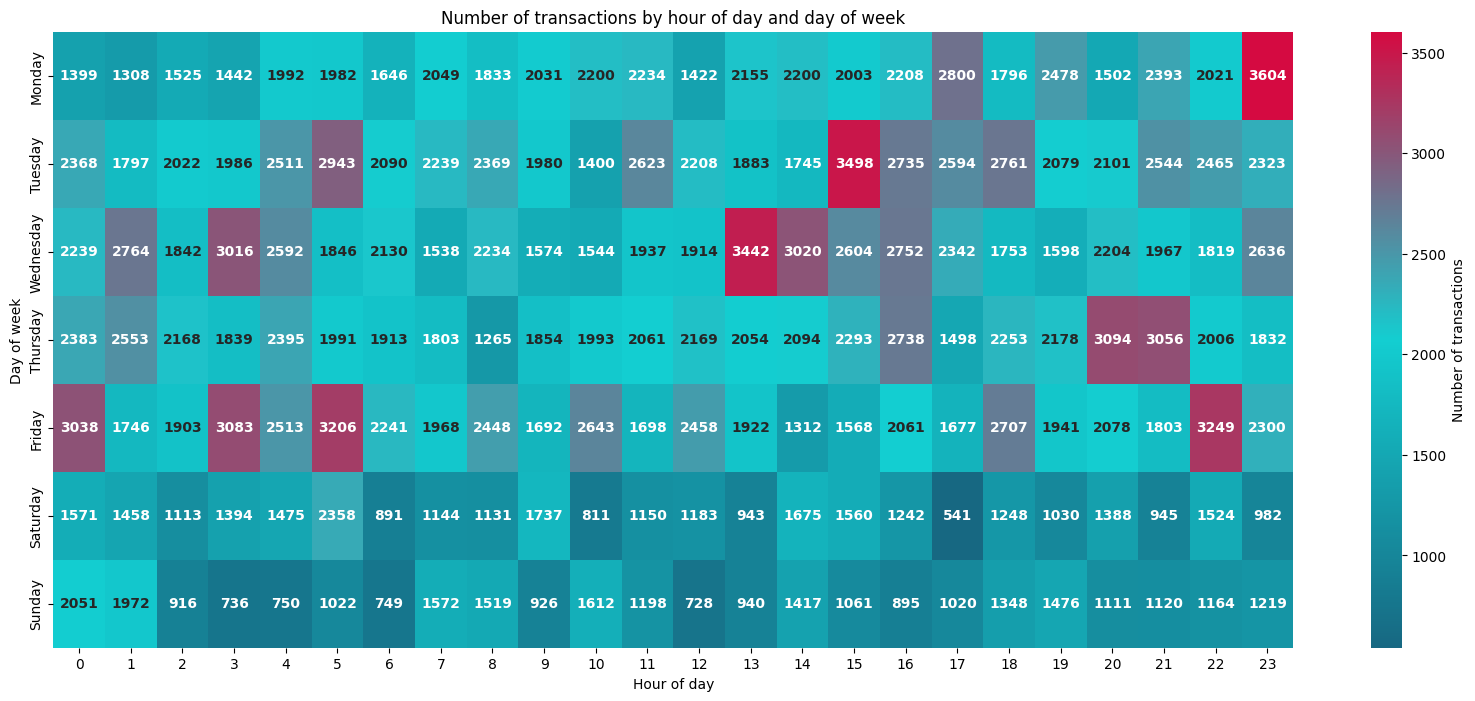

In [32]:
# number of transactions by hour of day and day of week
# create pivot table for heatmap
ct = "US"
heatmap_data = local_comp_data[local_comp_data["country"] == ct].pivot_table(
    values="price_in_usd",
    index="local_day_of_week",
    columns="local_hour_session",
    aggfunc="count",
    fill_value=0,
)

# rearrange the order of days in the week to display correctly
days_order = [
    "Monday",
    "Tuesday",
    "Wednesday",
    "Thursday",
    "Friday",
    "Saturday",
    "Sunday",
]
heatmap_data = heatmap_data.reindex(days_order)


def integer_formatter(x, pos):
    return f"{int(x)}"


# edit color
colors = ["#176882", "#13CED1", "#D50A41"]
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", colors)

# create heatmap
plt.figure(figsize=(20, 8))
ax = sns.heatmap(
    heatmap_data,
    cmap=custom_cmap,
    annot=True,
    fmt="",
    cbar_kws={"label": "Number of transactions"},
    annot_kws={"size": 10, "weight": "bold"},
)

ax.collections[0].colorbar.ax.yaxis.set_major_formatter(
    FuncFormatter(integer_formatter)
)

plt.title("Number of transactions by hour of day and day of week")
plt.xlabel("Hour of day")
plt.ylabel("Day of week")

plt.show()

**Nhận xét:**
- Users mua hàng nhiều nhất (>2500) vào:
  + Thứ hai(17h, 23h). 23h ngày thứ hai users thực hiện nhiều transaction nhất
  + Thứ ba(4-5h, 11h, 15-18h, 21h)
  + Thứ tư(1h, 3-4h, 13-16h, 23h)
  + Thứ năm(1h, 16h, 20-21h)
  + Thứ sáu(0h, 3-5h, 10h, 18h, 22h)

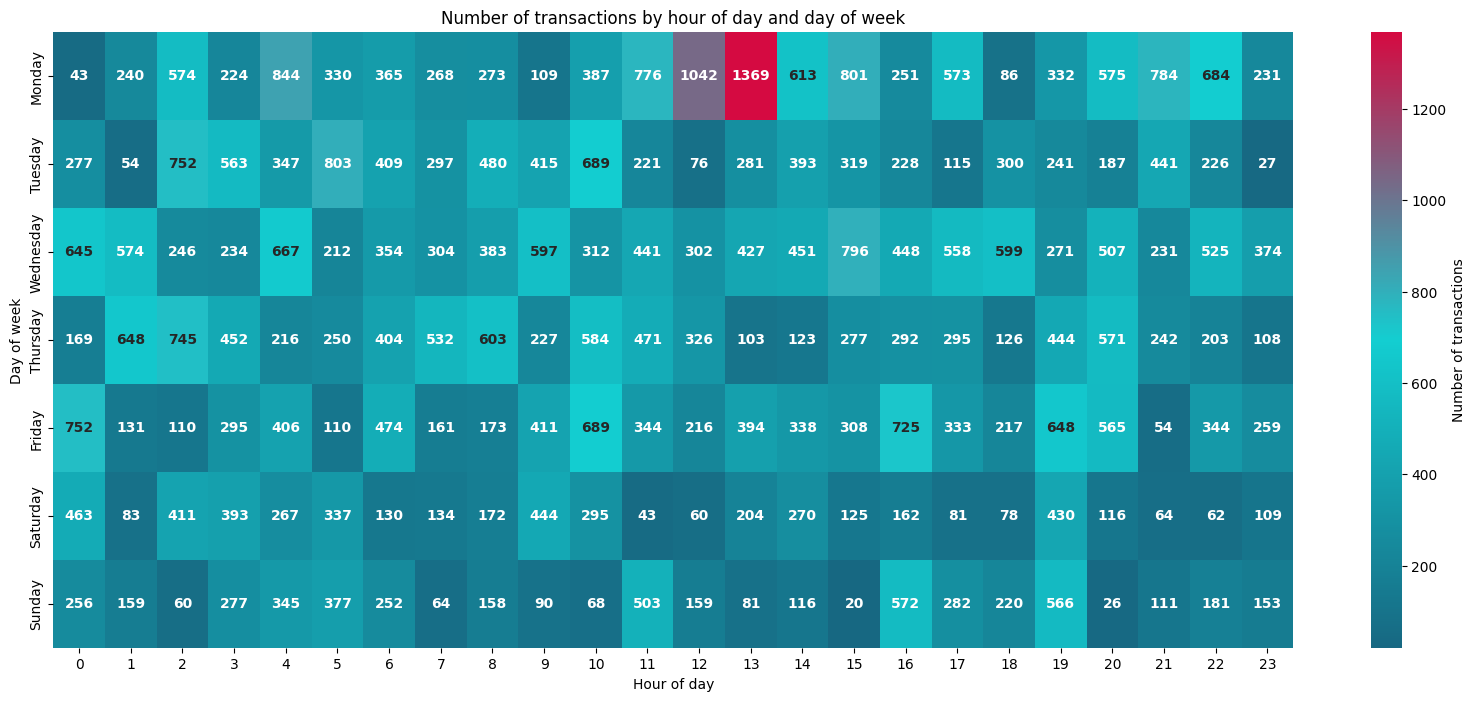

In [33]:
# number of transactions by hour of day and day of week
# create pivot table for heatmap
ct = "CA"
heatmap_data = local_comp_data[local_comp_data["country"] == ct].pivot_table(
    values="price_in_usd",
    index="local_day_of_week",
    columns="local_hour_session",
    aggfunc="count",
    fill_value=0,
)

# rearrange the order of days in the week to display correctly
days_order = [
    "Monday",
    "Tuesday",
    "Wednesday",
    "Thursday",
    "Friday",
    "Saturday",
    "Sunday",
]
heatmap_data = heatmap_data.reindex(days_order)


def integer_formatter(x, pos):
    return f"{int(x)}"


# edit color
colors = ["#176882", "#13CED1", "#D50A41"]
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", colors)

# create heatmap
plt.figure(figsize=(20, 8))
ax = sns.heatmap(
    heatmap_data,
    cmap=custom_cmap,
    annot=True,
    fmt="",
    cbar_kws={"label": "Number of transactions"},
    annot_kws={"size": 10, "weight": "bold"},
)

ax.collections[0].colorbar.ax.yaxis.set_major_formatter(
    FuncFormatter(integer_formatter)
)

plt.title("Number of transactions by hour of day and day of week")
plt.xlabel("Hour of day")
plt.ylabel("Day of week")

plt.show()

**Nhận xét:**
- Users mua hàng nhiều nhất (>1000) vào thứ 2(12-13h)

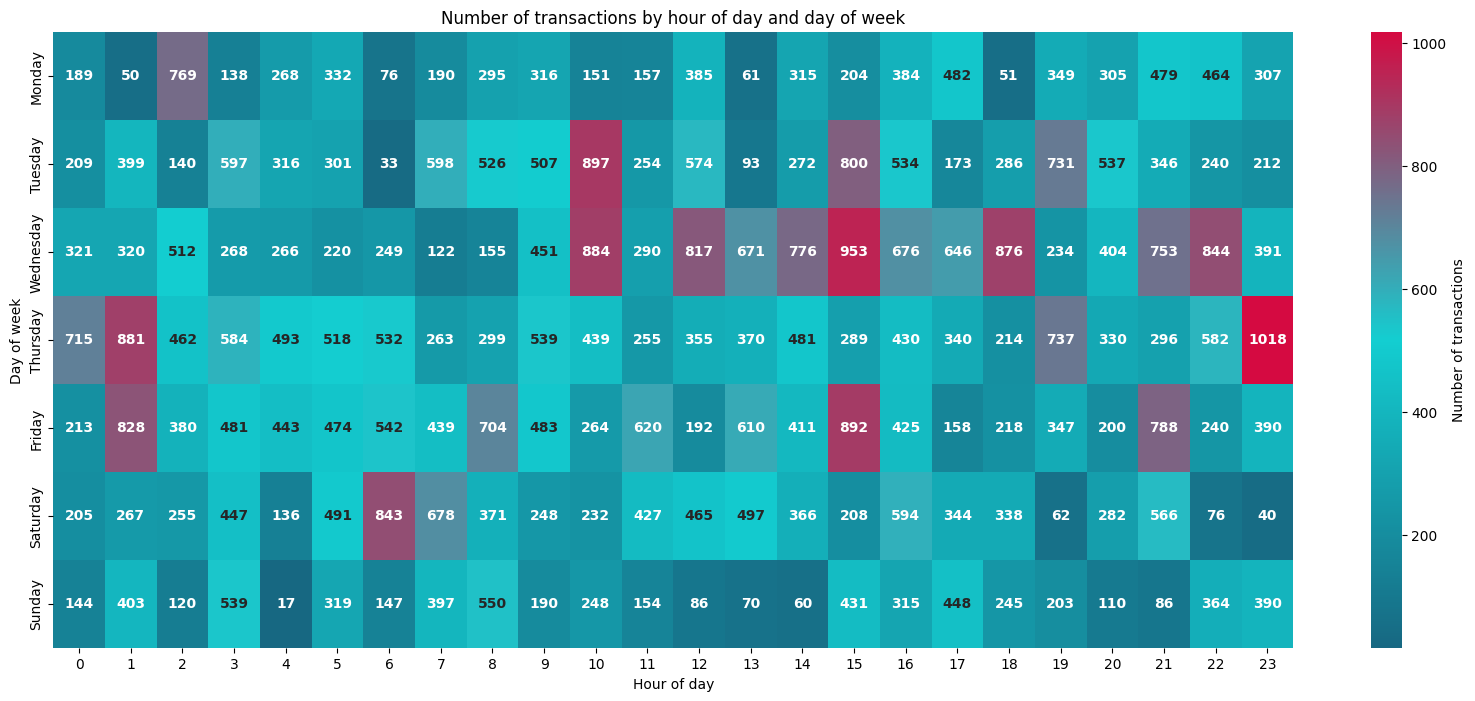

In [34]:
# number of transactions by hour of day and day of week
# create pivot table for heatmap
ct = "IN"
heatmap_data = local_comp_data[local_comp_data["country"] == ct].pivot_table(
    values="price_in_usd",
    index="local_day_of_week",
    columns="local_hour_session",
    aggfunc="count",
    fill_value=0,
)

# rearrange the order of days in the week to display correctly
days_order = [
    "Monday",
    "Tuesday",
    "Wednesday",
    "Thursday",
    "Friday",
    "Saturday",
    "Sunday",
]
heatmap_data = heatmap_data.reindex(days_order)


def integer_formatter(x, pos):
    return f"{int(x)}"


# edit color
colors = ["#176882", "#13CED1", "#D50A41"]
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", colors)

# create heatmap
plt.figure(figsize=(20, 8))
ax = sns.heatmap(
    heatmap_data,
    cmap=custom_cmap,
    annot=True,
    fmt="",
    cbar_kws={"label": "Number of transactions"},
    annot_kws={"size": 10, "weight": "bold"},
)

ax.collections[0].colorbar.ax.yaxis.set_major_formatter(
    FuncFormatter(integer_formatter)
)

plt.title("Number of transactions by hour of day and day of week")
plt.xlabel("Hour of day")
plt.ylabel("Day of week")

plt.show()

**Nhận xét:**
- Users mua hàng nhiều vào (>750):
 + Thứ 2(2h)
 + Thứ 3(10h, 15h)
 + Thứ 4(10h, 12h, 14-15h, 18h, 21-22h)
 + Thứ 5(1h, 23h). Đạt lượng transaction cao nhất
 + Thứ 6(1h, 15, 21h)
 + Thứ 7(6h)

### Export complete data

In [37]:
# Export to CSV
# comp_data.to_csv('/content/drive/MyDrive/DA_course1/Final project/comp_data_test_cohort.csv', index=False)

In [38]:
# Export data to a Markdown file for use in NotebookLM
# with open("/content/drive/MyDrive/DA_course1/Final project/items_markdown.md", 'w') as md:
#   itm.to_markdown(buf=md, tablefmt="grid")

## Step 3.2: EDA for data country null

In [39]:
# check info
data_country_null.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4291 entries, 16 to 758594
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   user_id           4291 non-null   int64 
 1   ga_session_id     4291 non-null   int64 
 2   country           0 non-null      object
 3   device            4291 non-null   object
 4   type              4291 non-null   object
 5   item_id           4291 non-null   int64 
 6   date_session      4291 non-null   object
 7   item_name         4291 non-null   object
 8   brand             4291 non-null   object
 9   variant           505 non-null    object
 10  category          4291 non-null   object
 11  price_in_usd      4291 non-null   int64 
 12  ltv               4291 non-null   int64 
 13  user_create_date  4291 non-null   object
dtypes: int64(5), object(9)
memory usage: 502.9+ KB


- Phạm vi index từ 16 đến 758594:
  + Có 4291 entries
  + Giá trị country là null

In [40]:
# sum GMV and % in total
sum_GMV_country_null = data_country_null[data_country_null["type"] == "purchase"][
    "price_in_usd"
].sum()
sum_GMV_country_null
percentage_GMV_country_null = (
    sum_GMV_country_null * 100 / test[test["type"] == "purchase"]["price_in_usd"].sum()
)
percentage_GMV_country_null
print(
    "sum GMV {} and percentage in total {}".format(
        sum_GMV_country_null, percentage_GMV_country_null
    )
)

sum GMV 1486 and percentage in total 0.5134637379192625


**Nhận xét:**
- GMV đóng góp vào doanh nghiệp chỉ có 0.5%. Cần tập trung vào phân tích bộ dữ liệu chứa đầy đủ thông tin. Bước tiếp theo sẽ tìm xem những khách hàng vip trong tập dữ liệu này xem họ có đóng góp đáng kể cho GMV hay không?

In [41]:
# vip user country null
vip_user_country_null = (
    data_country_null[data_country_null["type"] == "purchase"]
    .groupby("user_id")["price_in_usd"]
    .sum()
    .reset_index()
)
vip_user_country_null = vip_user_country_null.rename(columns={"price_in_usd": "GMV"})
vip_user_country_null = vip_user_country_null.sort_values(
    by="GMV", ascending=False
).reset_index()
vip_user_country_null

,index,user_id,GMV
0,0,741,272
1,8,8573,163
2,11,11032,146
3,7,8363,111
4,10,9657,75
5,22,25317,70
6,24,25390,60
7,9,9216,56
8,2,7211,55
9,27,31485,37


**Nhận xét:**
- Có 29 users tạo ra GMV, trong đó có 4 users tạo ra GMV cao hơn 100 USD (GMV cao nhất của users tạo ra trong tập dữ liệu đầy đủ là 1410 USD)

**Đề xuất:**
- Đối với những users tạo ta GMV cao. Tùy vào giá trị GMV của mỗi users tạo ra để xếp hạng thành viên tương ứng (từ việc phân tích trên tập dữ liệu có đầy đủ thông tin. Sau khi có plan chia hạng thành viên tùy theo mức độ GMV đóng góp thi ta có thể đưa những users của tập dữ liệu này sang trong plan đó)

## Step 3.3: EDA for data variant null

In [42]:
# check info
variant_null.info()

<class 'pandas.core.frame.DataFrame'>
Index: 635103 entries, 109492 to 758882
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   user_id           635103 non-null  int64 
 1   ga_session_id     635103 non-null  int64 
 2   country           631317 non-null  object
 3   device            635103 non-null  object
 4   type              635103 non-null  object
 5   item_id           635103 non-null  int64 
 6   date_session      635103 non-null  object
 7   item_name         635103 non-null  object
 8   brand             635103 non-null  object
 9   variant           0 non-null       object
 10  category          635103 non-null  object
 11  price_in_usd      635103 non-null  int64 
 12  ltv               635103 non-null  int64 
 13  user_create_date  635103 non-null  object
dtypes: int64(5), object(9)
memory usage: 72.7+ MB


- Phạm vi index từ 109492 đến 758882:
  + Có 635103 entries
  + Giá trị variant là null

In [43]:
# sum GMV and % in total
sum_GMV_variant_null = variant_null[variant_null["type"] == "purchase"][
    "price_in_usd"
].sum()
percentage_GMV_variant_null = (
    sum_GMV_variant_null * 100 / test[test["type"] == "purchase"]["price_in_usd"].sum()
)
print(
    "sum GMV {} and percentage in total {}".format(
        sum_GMV_variant_null, percentage_GMV_variant_null
    )
)

sum GMV 0 and percentage in total 0.0


In [44]:
variant_null[
    (variant_null["type"] == "begin_checkout") | (variant_null["type"] == "purchase")
].info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   user_id           0 non-null      int64 
 1   ga_session_id     0 non-null      int64 
 2   country           0 non-null      object
 3   device            0 non-null      object
 4   type              0 non-null      object
 5   item_id           0 non-null      int64 
 6   date_session      0 non-null      object
 7   item_name         0 non-null      object
 8   brand             0 non-null      object
 9   variant           0 non-null      object
 10  category          0 non-null      object
 11  price_in_usd      0 non-null      int64 
 12  ltv               0 non-null      int64 
 13  user_create_date  0 non-null      object
dtypes: int64(5), object(9)
memory usage: 0.0+ bytes


**Nhận xét:**
- Các records có giá trị variant là null thì đều có type là "add_to_cart". Đồng nghĩa với việc không tạo ta GMV cho doanh nghiệp
- Loại bỏ các rows chứa giá trị variant là null. Chỉ tập trung vào tập dữ liệu có chứa giá trị variant

##Supplement: Summarize dashboard to text

In [ ]:
# Load environment variables from the .env file if available
load_dotenv()

# OpenAI API Key
api_key = os.getenv("OPENAI_API_KEY")


# Function to encode the image
def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode("utf-8")


# Path to your image
image_path = "/content/drive/MyDrive/DA_course1/Final project/Dashboard 1.png"

# Getting the base64 string
base64_image = encode_image(image_path)

# Headers and payload for OpenAI API request
headers = {"Content-Type": "application/json", "Authorization": f"Bearer {api_key}"}

payload = {
    "model": "gpt-4-mini",
    "messages": [{"role": "user", "content": "Summarize this dashboard."}],
    "functions": [
        {
            "name": "summarize_dashboard",
            "arguments": [
                {"type": "image_url", "value": f"data:image/png;base64,{base64_image}"}
            ],
        }
    ],
    "max_tokens": 300,
}

# Sending the request to OpenAI API
response = requests.post(
    "https://api.openai.com/v1/chat/completions", headers=headers, json=payload
)

# Parsing the API response
response_data = response.json()
summary = (
    response_data.get("choices", [{}])[0]
    .get("message", {})
    .get("content", "No summary available.")
)

# Saving the summary into a PDF file
pdf = FPDF()
pdf.add_page()
pdf.set_font("Arial", size=12)
pdf.multi_cell(0, 10, summary)

# Save PDF to file
output_path = "/content/drive/MyDrive/DA_course1/dashboard_summary.pdf"
pdf.output(output_path)